# Importar todas las librerias necesarias

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Leer los archivos csv generados por el codigo en python


In [29]:
# Leer los archivos CSV con pd.read_csv
df_numeros = pd.read_csv('numeros.csv', header=None)
df_coincidencias = pd.read_csv('coincidencias.csv', header=None)

# Obtener los valores como un array bidimensional
arr_num = df_numeros.values
arr_coin = df_coincidencias.values


# Codigo que devuelve la cantidad de veces que salió cada numero segun el total de sorteos

In [61]:
# Configurar las opciones de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# Obtener la frecuencia de cada valor en el DataFrame
frecuencias = df_numeros.stack().value_counts()

df_resultado = pd.DataFrame({"Numeros": frecuencias.index, "Cantidad de veces que salió": frecuencias.values})
df_resultado = df_resultado.sort_values(by="Cantidad de veces que salió", ascending=False)
df_resultado.set_index("Numeros", inplace=True)


df_resultado

,Cantidad de veces que salió
Numeros,
22,90
74,89
98,89
42,88
58,87
32,86
10,84
87,84
96,83


# Grafico para ver que numero es el que mas sale por decena

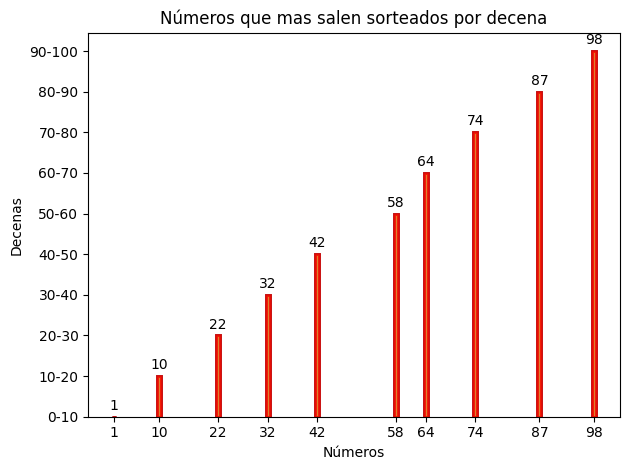

In [63]:
def obtener_numero_mas_repetido(lista):
    counter = Counter(lista)
    if len(counter) > 0:
        numero_mas_repetido = counter.most_common(1)[0][0]
    else:
        numero_mas_repetido = None
    return numero_mas_repetido

def crear_dataframe(array):
    decenas = list(range(0, 100, 10))  # Lista de decenas del 0 al 100
    etiquetas_decenas = [f"{i}-{i+10}" for i in decenas]  # Generar las etiquetas de las decenas
    conteo = []

    for decena in decenas:
        numeros_decena = [num for num in array if num >= decena and num < decena + 10]
        numero_mas_repetido = obtener_numero_mas_repetido(numeros_decena)
        conteo.append(numero_mas_repetido)

    data = {"Decenas": etiquetas_decenas, "Numero que mas sale": conteo}
    dataframe = pd.DataFrame(data)
    dataframe = dataframe.set_index("Decenas")
    return dataframe

lista_num = []
for i in arr_num:
    for j in i:
        lista_num.append(j)

dataframe_resultante = crear_dataframe(lista_num)


#VISUALIZARLO
x = dataframe_resultante["Numero que mas sale"].values
y = dataframe_resultante.index


# Configuración de ancho de las barras y el relieve
width = 0.8
relieve = 0.2

# Crear el gráfico de barras con barras anchas y relieve
plt.bar(x, y, width=width, edgecolor='black', linewidth=2, alpha=0.8)
plt.bar(x, y, width=width, edgecolor='red', linewidth=2, alpha=0.8)

# Personalizar el gráfico
plt.xlabel('Números')
plt.ylabel('Decenas')
plt.title('Números que mas salen sorteados por decena')

# Establecer las ubicaciones de las etiquetas del eje x
plt.xticks(x)

# Añadir etiquetas al lado de las barras con los valores del eje x
for i, valor in enumerate(x):
    plt.annotate(str(valor), (valor, y[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Ajustar el tamaño de las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Obtener los 8 numeros mas repetidos en ambos arrays
# Y mostrar en un grafico de matplotlib esos numeros y su frecuencia

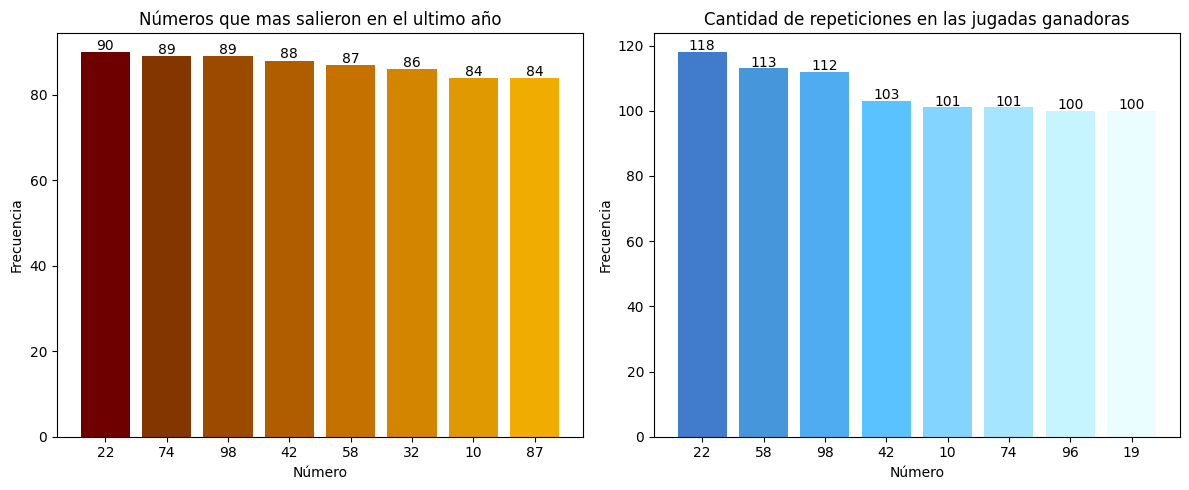

In [62]:
# Obtener los valores únicos y sus conteos
valores_num, conteos_num = np.unique(arr_num, return_counts=True)
valores_coin, conteos_coin = np.unique(arr_coin, return_counts=True)

# Ordenar los resultados por conteo descendente
indices_ordenados_num = np.argsort(conteos_num)[::-1]
indices_ordenados_coin = np.argsort(conteos_coin)[::-1]


# Obtener los 8 números con mayor frecuencia
numeros_comunes_num = valores_num[indices_ordenados_num][:8]
frecuencias_num = conteos_num[indices_ordenados_num][:8]

numeros_comunes_coin = valores_coin[indices_ordenados_coin][:8]
frecuencias_coin = conteos_coin[indices_ordenados_coin][:8]

resultados_numeros = np.array([numeros_comunes_num, frecuencias_num]).T
resultados_coincidencias = np.array([numeros_comunes_coin, frecuencias_coin]).T

def graficar_numeros_comunes(arr_num, arr_num2):
    # Obtener los valores únicos y sus conteos para el primer array
    valores, conteos = np.unique(arr_num, return_counts=True)

    # Ordenar los resultados por conteo descendente
    indices_ordenados = np.argsort(conteos)[::-1]

    # Obtener los 8 números con mayor frecuencia para el primer array
    numeros_comunes = valores[indices_ordenados][:8]
    frecuencias = conteos[indices_ordenados][:8]

    # Configurar los datos para el gráfico de barras del primer array
    x1 = [str(numero) for numero in numeros_comunes]
    y1 = frecuencias

    # Obtener los valores únicos y sus conteos para el segundo array
    valores2, conteos2 = np.unique(arr_num2, return_counts=True)

    # Ordenar los resultados por conteo descendente
    indices_ordenados2 = np.argsort(conteos2)[::-1]

    # Obtener los 8 números con mayor frecuencia para el segundo array
    numeros_comunes2 = valores2[indices_ordenados2][:8]
    frecuencias2 = conteos2[indices_ordenados2][:8]

    # Configurar los datos para el gráfico de barras del segundo array
    x2 = [str(numero) for numero in numeros_comunes2]
    y2 = frecuencias2

    # Colores cálidos para el primer array
    colores_calidos = ['#6E0000', '#843600', '#9B4A00', '#B05D00', '#C47100', '#D38500', '#E09900', '#F0AD00']

    # Colores fríos para el segundo array
    colores_frios = ['#417BCC', '#4696DC', '#50ACF0', '#5AC3FF', '#83D5FF', '#A5E5FF', '#C7F5FF', '#EAFDFF']

    # Crear el gráfico de barras con colores personalizados
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

    # Agregar los datos al gráfico de barras del primer array con colores cálidos
    ax[0].bar(x1, y1, color=colores_calidos)
    ax[0].set_title('Números que mas salieron en el ultimo año')
    ax[0].set_xlabel('Número')
    ax[1].set_xlabel('Número')
    ax[0].set_ylabel('Frecuencia')

    # Agregar etiquetas a las barras del primer array
    for i, v in enumerate(y1):
        ax[0].text(i, v + 0.5, str(v), ha='center')

    # Agregar los datos al gráfico de barras del segundo array con colores fríos
    ax[1].bar(x2, y2, color=colores_frios)
    ax[1].set_title('Cantidad de repeticiones en las jugadas ganadoras')
    ax[1].set_ylabel('Frecuencia')

    # Agregar etiquetas a las barras del segundo array
    for i, v in enumerate(y2):
        ax[1].text(i, v + 0.5, str(v), ha='center')

    # Ajustar el espaciado entre subplots
    plt.tight_layout()

    # Mostrar los gráficos de barras
    plt.show()



graficar_numeros_comunes(arr_num, arr_coin)


# Se comparan los numeros que mas salen en:
- LOS 20 NUMEROS SORTEADOS DURANTE EL AÑO
- LOS NUMEROS QUE MAS SALEN EN LAS JUGADAS GANADORAS
- LOS NUMEROS QUE MAS SALEN POR DECENA

In [74]:
array1 = resultados_coincidencias[:, 0]
array2 = resultados_numeros[:, 0]
array3 = dataframe_resultante["Numero que mas sale"].values

resultado = np.intersect1d(np.intersect1d(array1, array2), array3)
print(resultado) 


[10 22 42 58 74 98]
